<a href="https://colab.research.google.com/github/vishymails/Cyber_security_AIML_june2024/blob/main/cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to use models


In [ ]:
from random import random

In [ ]:
time_series = [2 * x + random() for x in range(1, 100)]

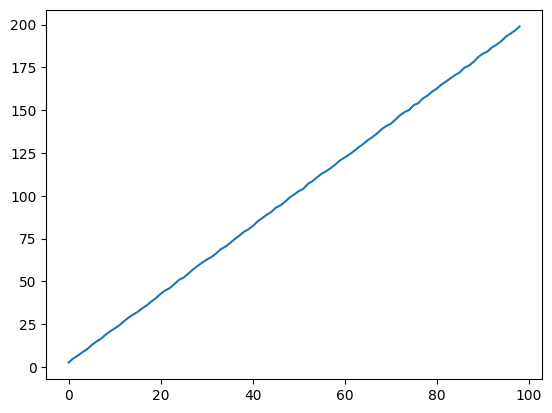

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, 12)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[200.66332869]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order = (1, 0, 0))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[198.8414094]


In [ ]:
model_fit.summary

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x78b0db2353f0>>

In [ ]:
model_fit.params

array([100.54655227,   0.99978029,   4.16922355])

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -215.013
Date:                Tue, 04 Jun 2024   AIC                            436.027
Time:                        06:24:02   BIC                            443.812
Sample:                             0   HQIC                           439.177
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5466     96.781      1.039      0.299     -89.141     290.234
ar.L1          0.9998      0.004    272.074      0.000       0.993       1.007
sigma2         4.1692      2.179      1.914      0.056      -0.101       8.439
===================================================================================
Ljung-Box (L1) (Q):                   6.53   Jarque-Bera (JB):              2327.94
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -3.42
Prob(H) (two-sided):                  0.81   Kurtosis:                        25.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Anomally Detection with Isolation Forest


In [ ]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

In [ ]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3 , X_train]

X_train = pd.DataFrame(X_train, columns = ['x', 'y'])

X_train.head()

,x,y
0,3.236493,2.659287
1,3.121220,2.149632
2,3.376571,2.232639
3,3.002564,2.939886
4,2.596509,4.435910


In [ ]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3 , X_test]

X_test = pd.DataFrame(X_test, columns = ['x', 'y'])

X_test.head()

,x,y
0,3.944575,3.866919
1,2.984853,3.142150
2,3.501735,2.168262
3,2.906300,3.233826
4,3.273225,3.261790


In [ ]:
X_outliers = random_seed.uniform(low = -5, high = 5, size = (50, 2))

X_outliers = pd.DataFrame(X_outliers, columns = ['x', 'y'])

X_outliers.head()

,x,y
0,3.947504,2.891003
1,0.413976,-2.025841
2,-2.644476,-3.480783
3,-0.518212,-3.386443
4,2.977669,2.215355


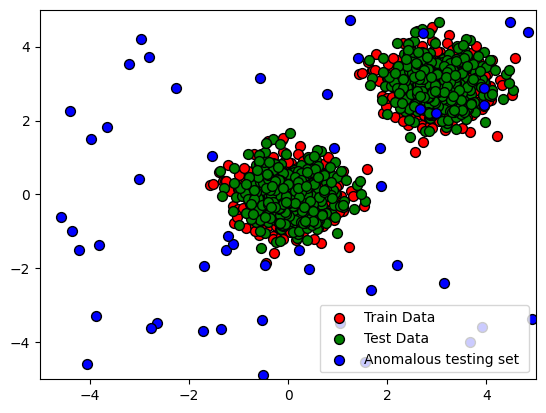

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train['x'], X_train['y'], c = "red", s = 50, edgecolor = "k")
p2 = plt.scatter(X_test['x'], X_test['y'], c = "green", s = 50, edgecolor = "k")
p3 = plt.scatter(X_outliers['x'], X_outliers['y'], c = "blue", s = 50, edgecolor = "k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend([p1, p2, p3], ['Train Data ', 'Test Data ', 'Anomalous testing set '], loc = "lower right")
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

y_outliers_pred = clf.predict(X_outliers)



In [ ]:
X_outliers = X_outliers.assign(pred = y_outliers_pred)

X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


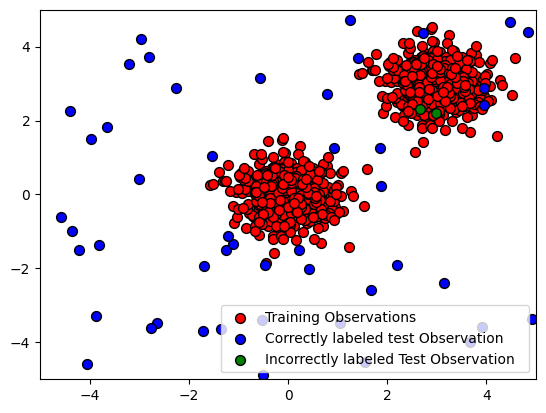

In [ ]:

p1 = plt.scatter(X_train['x'], X_train['y'], c = "red", s = 50, edgecolor = "k")
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ['x']], X_outliers.loc[X_outliers.pred == -1, ['y']], c = "blue", s = 50, edgecolor = "k")
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ['x']], X_outliers.loc[X_outliers.pred == 1, ['y']], c = "green", s = 50, edgecolor = "k")


plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.legend([p1, p2, p3], ['Training Observations ', 'Correctly labeled test Observation ', 'Incorrectly labeled Test Observation  '], loc = "lower right")
plt.show()

Standardizing your data

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cyber_security_AIML_june2024/main/file_pe_headers.csv", sep=",")

data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [ ]:
import pandas as pd

data = pd.read_csv("file_pe_headers.csv", sep=",")

data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [ ]:
X = data.drop(["Name", "Malware"], axis=1).to_numpy()

X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler()

X_standardized = X_standardized.fit_transform(X)

print(X_standardized)

[[ 0.         -0.03506542 -0.04751096 ... -0.07054894 -0.0198525
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.03849221 -0.02110877
  -0.02469983]
 [ 0.         -0.03506542 -0.04751096 ... -0.07599254 -0.02110877
  -0.04066791]
 ...
 [ 0.         -0.18093613 -0.04958686 ... -0.07296832 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.06691988 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ...  0.00021781 -0.02110877
  -0.04066791]]


In [ ]:
data.shape


(19611, 79)

In [ ]:
X.shape

(19611, 77)

In [ ]:
data.describe()

<bound method NDFrame.describe of                                               Name  e_magic  e_cblp  e_cp  \
0      VirusShare_a878ba26000edaac5c98eff4432723b3    23117     144     3   
1      VirusShare_ef9130570fddc174b312b2047f5f4cf0    23117     144     3   
2      VirusShare_ef84cdeba22be72a69b198213dada81a    23117     144     3   
3      VirusShare_6bf3608e60ebc16cbcff6ed5467d469e    23117     144     3   
4      VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb    23117     144     3   
...                                            ...      ...     ...   ...   
19606                                     clip.exe    23117     144     3   
19607                 VNC-Server-6.2.0-Windows.exe    23117     144     3   
19608      Microsoft.GroupPolicy.Management.ni.dll    23117       0     0   
19609                            cryptuiwizard.dll    23117     144     3   
19610                                  winhttp.dll    23117     144     3   

       e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  ...  \
0           0          4           0       65535     0   184  ...   
1           0          4           0       65535     0   184  ...   
2           0          4           0       65535     0   184  ...   
3           0          4           0       65535     0   184  ...   
4           0          4           0       65535     0   184  ...   
...       ...        ...         ...         ...   ...   ...  ...   
19606       0          4           0       65535     0   184  ...   
19607       0          4           0       65535     0   184  ...   
19608       0          0           0           0     0     0  ...   
19609       0          4           0       65535     0   184  ...   
19610       0          4           0       65535     0   184  ...   

       SectionMaxChar  SectionMainChar  DirectoryEntryImport  \
0          3758096608                0                     7   
1          3791650880                0                    16   
2          3221225536                0                     6   
3          3224371328                0                     8   
4          3227516992                0                     2   
...               ...              ...                   ...   
19606      3221225536                0                     8   
19607      3221225536                0                    10   
19608      3758096448                0                     0   
19609      3221225536                0                    12   
19610      3221225536                0                    35   

       DirectoryEntryImportSize  DirectoryEntryExport  \
0                           152                     0   
1                           311                     0   
2                           176                     0   
3                           155                     0   
4                            43                     0   
...                         ...                   ...   
19606                        85                     0   
19607                       391                     0   
19608                         0                     0   
19609                       162                     8   
19610                       226                    58   

       ImageDirectoryEntryExport  ImageDirectoryEntryImport  \
0                              0                      54440   
1                              0                     262276   
2                              0                      36864   
3                              0                     356352   
4                              0                      61440   
...                          ...                        ...   
19606                          0                      24948   
19607                          0                    1413420   
19608                          0                          0   
19609                      89008                      94904   
19610                       8348                     545812   

 

In [ ]:
data.shape

(19611, 79)

In [ ]:
data.drop(["Name", "Malware"], axis=1, inplace=True)



In [ ]:
data.shape

(19611, 77)

Training an XGBoost Classifier for faster performance

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cyber_security_AIML_june2024/main/file_pe_headers.csv", sep=",")

df.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [ ]:
y = df["Malware"]

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Malware, dtype: int64

In [ ]:
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = model.predict(X_test)

y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy : %.2f%%" % (accuracy * 100))

Accuracy : 99.18%


In [ ]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))

In [ ]:
# testing with live data


model_ret = pickle.load(open("model.pkl", "rb"))
print(model_ret.predict(X_test))

[1 1 1 ... 1 1 1]


Markov Chains

In [2]:
! pip install markovify

In [3]:
import markovify

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cyber_security_AIML_june2024/main/airport_reviews.csv")


In [5]:
df.head(3)


,content
0,The airport is certainly tiny! Arriving there ...
1,Small airports are generally intimate friendly...
2,Waited an hour in a corridor for baggage but o...


In [9]:
from itertools import chain

N = 100
review_subset = df['content'][0:N]

text = "".join(chain.from_iterable(review_subset))

text

'The airport is certainly tiny! Arriving there was good off the plane quick straight onto a connecting bus to Brussels. Staff at the information stand were helpful & spoke English. The outbound journey wasn\'t as pleasant security was over zealous (having to remove belt watch etc) and very unfriendly. Didn\'t bother using the \'canteen\' in the cupboard (departure lounge 1) and there was a big crush fighting fellow passengers to get on the aircraft. The toilets in the lounge were filthy stinking & graffitid. Having said that for a flight that cost about the same as a pizza it\'s worth putting up with and I\'d use it again.Small airports are generally intimate friendly and welcoming. Not so with Charleroi. It is dirty seriously overcrowded at peak times and facilities are terrible. Ryanair does a good job of running a base on these facilities mind. Links to Brussels are good but that\'s really thanks to Ryanair themselves. Food is terrible and waiting areas are not so conducive to exten

In [10]:
markov_chain_model = markovify.Text(text)



In [11]:
for i in range(5) :
  print(markov_chain_model.make_sentence())

One of two Security Gates has to go from section A to B. Then there is usually enough seating and the UK on a bus to drive a further few kms to get through this point.
Long line up for a considerable increase in traffic.
This includes an arbitrary €3.60 tax imposed by the speed of immigration on arrival at destination - no baggage - it is one of the best small airports in Europe.
I took the note back and changed it at a money exchange with no queue but then very long corridor develops.
Baggage drop off was very rude and not in the shops.Cool modern design and lots of space to sit good indications and long corridors.


In [12]:
for i in range(3) :
  print(markov_chain_model.make_short_sentence(140))

The toilet facilities are poor with the same time.Arrived from Paris to Oradea.
The ticket barcode access scanner for fast track security and off to the gates and vice-versa.
Baggage drop off was very efficient my luggage was on the screens until -30 of departure but it will be at the same time.


Email Spam Detection System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/vishymails/Cyber_security_AIML_june2024/main/spam_ham_dataset.csv")

data.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
# Data analysis


class_counts = data['label'].value_counts()
print(class_counts)

label
ham     3672
spam    1499
Name: count, dtype: int64


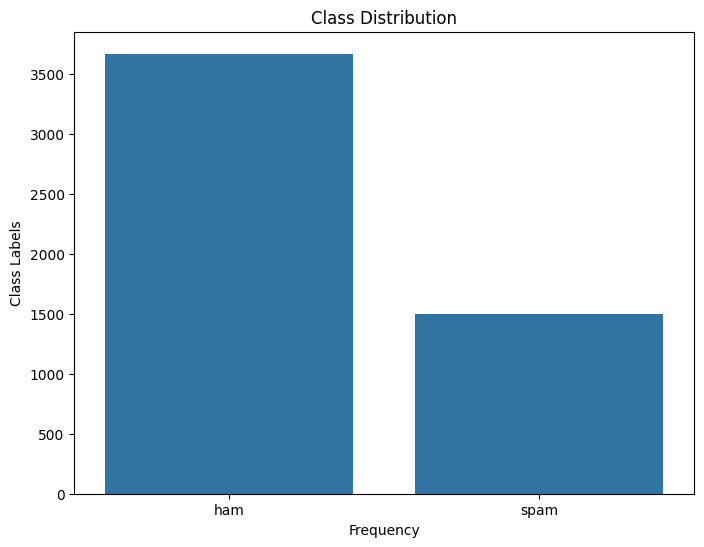

In [4]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Frequency')
plt.ylabel('Class Labels')
plt.show()

In [5]:
# Word Frequency

In [6]:
from collections import Counter

data[data['label'] == 'ham']

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...,...
5165,2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [7]:
data[data['label'] == 'ham']["text"]

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
4       Subject: re : indian springs\r\nthis deal is t...
5       Subject: ehronline web address change\r\nthis ...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [8]:
def get_most_common_words(class_label, num_words, column_name, dataset) :
  text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])

  words = text.lower().split()

  word_counts = Counter(words)

  most_common_words = word_counts.most_common(num_words)

  return most_common_words

In [9]:
get_most_common_words("ham", 10, "text", data)

[('-', 77782),
 ('/', 37141),
 ('.', 35192),
 (',', 29413),
 (':', 20492),
 ('the', 18359),
 ('to', 15172),
 ('ect', 13897),
 ('@', 12168),
 ('for', 7982)]

In [10]:
get_most_common_words("spam", 10, "text", data)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787)]

In [11]:
len("This id my first mail")

21

In [12]:
data["text_length"] = data["text"].apply(lambda x : len(x))

data.head()

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [13]:
data.groupby("label")["text_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [14]:
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
data["text"].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [17]:
def preprocess_text(text) :
  text = text.lower()

  text = text.translate(str.maketrans("", "", string.punctuation))

  words = text.split()

  words = [word for word in words if word not in ENGLISH_STOP_WORDS]

  text = " ".join(words)

  return text


In [18]:
preprocess_text(data["text"].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [19]:
data["cleaned_text"] = data["text"].apply(preprocess_text)

data.head()

,Unnamed: 0,label,text,label_num,text_length,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [20]:
ham_words = get_most_common_words("ham", 100, "cleaned_text", data)

spam_words = get_most_common_words("spam", 100, "cleaned_text", data)

In [21]:
spam_words

[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631),
 ('www', 587),
 ('00', 585),
 ('information', 520),
 ('font', 515),
 ('5', 510),
 ('td', 504),
 ('t', 502),
 ('4', 494),
 ('statements', 476),
 ('email', 474),
 ('price', 471),
 ('d', 469),
 ('7', 457),
 ('new', 432),
 ('nbsp', 418),
 ('p', 384),
 ('height', 362),
 ('time', 361),
 ('8', 321),
 ('99', 321),
 ('o', 315),
 ('free', 313),
 ('pills', 311),
 ('6', 307),
 ('size', 306),
 ('width', 306),
 ('stock', 299),
 ('2004', 299),
 ('10', 298),
 ('message', 297),
 ('r', 297),
 ('money', 295),
 ('b', 294),
 ('investment', 289),
 ('9', 285),
 ('m', 284),
 ('u', 283),
 ('report', 282),
 ('c', 275),
 ('just', 264),
 ('securities', 263),
 ('online', 257),
 ('business', 256),
 ('click', 256),
 ('looking', 254),
 ('best', 254),
 ('100', 252),
 ('000', 247),
 ('60', 246),
 ('like', 243),
 ('mail', 243),
 ('computron', 242),
 ('contact', 242),
 ('pr

In [22]:
ham_words

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('subject', 6403),
 ('2000', 4308),
 ('gas', 2861),
 ('deal', 2789),
 ('com', 2717),
 ('meter', 2459),
 ('cc', 2359),
 ('pm', 2325),
 ('hpl', 2318),
 ('s', 2111),
 ('2001', 2024),
 ('1', 2023),
 ('daren', 1901),
 ('000', 1880),
 ('00', 1819),
 ('10', 1815),
 ('thanks', 1813),
 ('01', 1723),
 ('corp', 1710),
 ('3', 1683),
 ('d', 1658),
 ('2', 1521),
 ('know', 1438),
 ('mmbtu', 1349),
 ('e', 1338),
 ('11', 1311),
 ('j', 1300),
 ('forwarded', 1296),
 ('need', 1257),
 ('12', 1206),
 ('03', 1185),
 ('farmer', 1137),
 ('let', 1086),
 ('4', 1083),
 ('attached', 1083),
 ('5', 1055),
 ('xls', 1020),
 ('02', 1014),
 ('new', 1003),
 ('l', 923),
 ('04', 901),
 ('t', 894),
 ('0', 888),
 ('contract', 883),
 ('volume', 877),
 ('robert', 875),
 ('day', 874),
 ('sitara', 861),
 ('05', 847),
 ('nom', 831),
 ('09', 811),
 ('08', 802),
 ('texas', 796),
 ('volumes', 790),
 ('month', 780),
 ('30', 766),
 ('questions', 760),
 ('pec', 752),
 ('m', 747),
 ('9

In [23]:
data["cleaned_text"]

0       subject enron methanol meter 988291 follow not...
1       subject hpl nom january 9 2001 attached file h...
2       subject neon retreat ho ho ho wonderful time y...
3       subject photoshop windows office cheap main tr...
4       subject indian springs deal book teco pvr reve...
                              ...                        
5166    subject 10 ft transport volumes decreased 2500...
5167    subject 3 4 2000 following noms hpl t extra 15...
5168    subject calpine daily gas nomination julie men...
5169    subject industrial worksheets august 2000 acti...
5170    subject important online banking alert dear va...
Name: cleaned_text, Length: 5171, dtype: object